<a href="https://colab.research.google.com/github/jrauf/Electric-Vehicle-Market-Analysis/blob/main/EVMA_Final_phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable.
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [ ]:
import requests
import json
import pandas as pd
import csv
from bs4 import BeautifulSoup
from alpha_vantage.timeseries import TimeSeries
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from urllib.parse import urljoin

In [ ]:
api_key = 'K65ZJWE147FPVDA2'

# Set up the TimeSeries class with your API key
ts = TimeSeries(key=api_key, output_format='pandas')

In [ ]:
def data_parser():

    #CSV DATA START

    #fixing state abbreviations

    state_abbreviations = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
        'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
        'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
        'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
        'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
        'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
        'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
        'VA': 'Virginia', 'WA': 'Washington', 'DC': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'PR': 'Puerto Rico'
    }

    original_data = 'alt_fuel_stations (Jul 29 2021).csv'
    new_data = 'new_data.csv'

    filtered_data = []

    def is_EV_data(row):
        return row[0] == 'ELEC'



    with open(original_data, 'r') as read_file:
        csv_reader = csv.reader(read_file)
        header = next(csv_reader)
        state_index = header.index('State')

        for row in csv_reader:
            if is_EV_data(row):
                row[state_index] = state_abbreviations.get(row[state_index], row[state_index])
                filtered_data.append(row)

    with open(new_data, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(header)
        for row in filtered_data:
            csv_writer.writerow(row)

    df = pd.read_csv('new_data.csv')
    columns_to_delete = ['Plus4','BD Blends','NG Fill Type Code','NG PSI','Federal Agency ID','Federal Agency Name','Hydrogen Status Link','NG Vehicle Class','LPG Primary','E85 Blender Pump','Intersection Directions (French)','Access Days Time (French)','BD Blends (French)','Groups With Access Code (French)','Hydrogen Is Retail','Federal Agency Code','CNG Dispenser Num','CNG On-Site Renewable Source','CNG Total Compression Capacity','CNG Storage Capacity','LNG On-Site Renewable Source','E85 Other Ethanol Blends','EV Pricing (French)','LPG Nozzle Types','Hydrogen Pressures','Hydrogen Standards','CNG Fill Type Code','CNG PSI','CNG Vehicle Class','LNG Vehicle Class','Restricted Access']
    df.drop(columns_to_delete, axis=1, inplace=True)
    df.fillna('No Data', inplace = True)
    df.to_csv('new_data.csv', index=False)


    #Counting States Dictionary

    state_counts = {}

    with open(new_data, 'r') as read_file:
        csv_reader = csv.reader(read_file)
        next(csv_reader)
        for row in csv_reader:
            state = row[state_index]
            state_counts[state] = state_counts.get(state, 0) + 1

    for state, count in state_counts.items():
        print(f"{state}: {count}")
    pass


############ Function Call ############
data_parser()

/var/folders/h2/kz5rv5jj3k7f069vh4d71zwm0000gn/T/ipykernel_41614/3059435106.py:46: DtypeWarning: Columns (6,10,20,31,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_data.csv')


California: 13892
Vermont: 312
Washington: 1964
Oregon: 942
Illinois: 996
Idaho: 136
Texas: 2199
Tennessee: 676
Virginia: 1025
New York: 2756
Florida: 2506
Wisconsin: 471
Iowa: 246
Minnesota: 561
Arkansas: 144
Arizona: 804
Connecticut: 517
Maryland: 1173
New Jersey: 712
Rhode Island: 228
South Carolina: 376
Michigan: 781
Ohio: 841
West Virginia: 104
Missouri: 1013
Georgia: 1548
Utah: 846
Kansas: 481
Massachusetts: 1889
Colorado: 1488
New Mexico: 171
Indiana: 341
Nevada: 449
Louisiana: 158
North Carolina: 1046
New Hampshire: 152
Alabama: 257
Hawaii: 393
Pennsylvania: 1081
Oklahoma: 295
Maine: 271
Kentucky: 177
Nebraska: 160
Mississippi: 110
South Dakota: 50
Delaware: 114
Montana: 69
North Dakota: 56
Wyoming: 64
Alaska: 40
Puerto Rico: 5


## Web Collection Requirement \#1


In [ ]:
#NOTE: API req is in extra sources. Both BS4 are up here for organization.

def web_parser1():
    url = "https://en.wikipedia.org/wiki/Tesla,_Inc."

    response = requests.get(url)

    soup = BeautifulSoup(response.text, "html.parser")

    table = soup.find("table", {"class": "wikitable", "style": "text-align:right;"})

    columns = {
        'Year': [],
        'Revenue (mil. USD)': [],
        'Net income (mil. USD)': [],
        'Total assets (mil. USD)': [],
        'Employees': []
    }

    rows = table.find_all("tr")[1:]

    for row in rows:
        cells = row.find_all("td")
        if cells:
            columns['Year'].append(cells[0].get_text(strip=True))
            columns['Revenue (mil. USD)'].append(cells[1].get_text(strip=True))
            columns['Net income (mil. USD)'].append(cells[2].get_text(strip=True))
            columns['Total assets (mil. USD)'].append(cells[3].get_text(strip=True))
            columns['Employees'].append(cells[4].get_text(strip=True))

    columns['Year'] = pd.Series(columns['Year']).str.replace(r"\[.*\]", "", regex=True)

    df = pd.DataFrame(columns)

    csv_file = 'Tesla_Financials.csv'
    df.to_csv(csv_file, index=False)

    tesla_data = pd.read_csv('Tesla_Financials.csv')

    # using regex for cleaning 'Year' column by removing brackets and their contents
    tesla_data['Year'] = tesla_data['Year'].astype(str).str.replace(r"\[.*\]", "", regex=True)
    tesla_data['Year'] = tesla_data['Year'].astype(int)

    tesla_data.fillna('no data', inplace=True)
    tesla_data['Revenue (mil. USD)'] = pd.Series(tesla_data['Revenue (mil. USD)']).replace(',', '', regex=True).astype(float).apply(lambda x: f'{x:,.3f}')

    tesla_data.to_csv('Tesla_Financials.csv', index=False)

    print(tesla_data.head())

    print(f"Data exported to {csv_file}")
    pass


############ Function Call ############
web_parser1()

   Year Revenue (mil. USD) Net income (mil. USD) Total assets (mil. USD)  \
0  2005              0.000                   −12                       8   
1  2006              0.000                   −30                      44   
2  2007              0.073                   −78                      34   
3  2008             15.000                   −83                      52   
4  2009            112.000                   −56                     130   

  Employees  
0   no data  
1        70  
2       268  
3       252  
4       514  
Data exported to Tesla_Financials.csv


## Web Collection Requirement #2

In [ ]:
def web_parser2():
    url = "https://en.wikipedia.org/wiki/Rivian"

    response = requests.get(url)

    soup = BeautifulSoup(response.text, "html.parser")

    table = soup.find("table", {"class": "wikitable", "style": "text-align:right;"})

    columns = {
        'Year': [],
        'Revenue (mil. USD)': [],
        'Net income (mil. USD)': [],
        'Total assets (mil. USD)': [],
        'Employees': []
    }

     # rows from table skipping header
    rows = table.find_all("tr")[1:]

    # Iterate over rows and extract columns data
    for row in rows:
        cells = row.find_all("td")
        if cells:
            columns['Year'].append(cells[0].get_text(strip=True))
            columns['Revenue (mil. USD)'].append(cells[1].get_text(strip=True))
            columns['Net income (mil. USD)'].append(cells[2].get_text(strip=True))
            columns['Total assets (mil. USD)'].append(cells[3].get_text(strip=True))
            columns['Employees'].append(cells[4].get_text(strip=True))

    columns['Year'] = pd.Series(columns['Year']).str.replace(r"\[.*\]", "", regex=True)

    # Convert columns dictionary to DataFrame
    df = pd.DataFrame(columns)
    df.fillna('no_value', inplace=False)
    df.fillna('no data', inplace = True)
    print(df)

    # Saving the DataFrame to a CSV file
    csv_file = 'Rivian_Financials.csv'
    df.to_csv(csv_file, index=False)

    # print(df)

    print(f"Data exported to {csv_file}")
    pass





############ Function Call ############
web_parser2()

   Year Revenue (mil. USD) Net income (mil. USD) Total assets (mil. USD)  \
0  2020                  0                −1,018                   4,602   
1  2021                 55                −4,688                  22,294   
2  2022              1,658                −6,752                  17,876   

  Employees  
0            
1      11.5  
2            
Data exported to Rivian_Financials.csv


In [ ]:
def extra_source1():
    # Get daily stock data for the company
    TSLA_data, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')
    TSLA_data.to_csv('TSLA_data.csv')

    print(TSLA_data)
    pass
############ Function Call ############
extra_source1()

            1. open   2. high    3. low  4. close    5. volume
date                                                          
2023-12-08   240.27  245.2700  239.2701    243.84  102775702.0
2023-12-07   241.55  244.0800  236.9800    242.64  107142262.0
2023-12-06   242.92  246.5700  239.1709    239.37  125905295.0
2023-12-05   233.87  246.6600  233.7000    238.72  137971115.0
2023-12-04   235.75  239.3733  233.2902    235.58  104099817.0
...             ...       ...       ...       ...          ...
2010-07-06    20.00   20.0000   15.8300     16.11    6866900.0
2010-07-02    23.00   23.1000   18.7100     19.20    5139800.0
2010-07-01    25.00   25.9200   20.2700     21.96    8218800.0
2010-06-30    25.79   30.4192   23.3000     23.83   17187100.0
2010-06-29    19.00   25.0000   17.5400     23.89   18766300.0

[3386 rows x 5 columns]


In [ ]:
def extra_source2():
    RIVN_data, meta_data = ts.get_daily(symbol='RIVN', outputsize='full')
    RIVN_data.to_csv('RIVN_data.csv') #to new csv

    print(RIVN_data)
    pass
############ Function Call ############
extra_source2()

            1. open   2. high    3. low  4. close    5. volume
date                                                          
2023-12-08   19.040   19.5500   18.6200     19.04   34831136.0
2023-12-07   18.950   19.2300   18.3000     19.19   37582962.0
2023-12-06   17.650   19.4200   17.4000     18.38   59064739.0
2023-12-05   17.600   18.0200   17.2912     17.41   23840354.0
2023-12-04   17.760   18.2500   17.5100     17.74   31666429.0
...             ...       ...       ...       ...          ...
2021-11-16  163.800  179.4699  153.7800    172.01   94036577.0
2021-11-15  130.800  152.5300  127.5100    149.36   64982343.0
2021-11-12  128.645  135.2000  125.2500    129.95   50345677.0
2021-11-11  114.625  125.0000  108.0100    122.99   83668202.0
2021-11-10  106.750  119.4600   95.2000    100.73  103679466.0

[523 rows x 5 columns]


In [ ]:
def extra_source3():
    HYMTF_data, meta_data = ts.get_daily(symbol='HYMTF', outputsize='full')
    HYMTF_data.to_csv('HYMTF_data.csv')

    print(HYMTF_data)
    pass

############ Function Call ############
extra_source3()

            1. open  2. high  3. low  4. close  5. volume
date                                                     
2023-12-08  40.5100  40.5100   40.51     40.51      109.0
2023-12-07  40.5125  40.5125   40.00     40.51     1339.0
2023-12-06  40.2600  40.5100   40.26     40.26      843.0
2023-12-05  40.7000  40.9500   40.20     40.20     1721.0
2023-12-04  40.6000  40.6000   40.60     40.60     1020.0
...             ...      ...     ...       ...        ...
2016-01-11  40.0500  40.0500   40.05     40.05      683.0
2016-01-08  39.4400  39.4400   39.44     39.44      109.0
2016-01-07  39.4400  39.4400   39.44     39.44      304.0
2016-01-06  43.1500  43.1500   43.15     43.15      430.0
2016-01-05  43.1500  43.1500   43.15     43.15      999.0

[1891 rows x 5 columns]


In [ ]:
def extra_source4():
    def analyze(review): # Helper func to analyze each review

        # load model and tokenizer
        roberta = "cardiffnlp/twitter-roberta-base-sentiment"

        model = AutoModelForSequenceClassification.from_pretrained(roberta)
        tokenizer = AutoTokenizer.from_pretrained(roberta)

        labels = ['Negative', 'Neutral', 'Positive']

        # sentiment analysis
        encoded_tweet = tokenizer(review, return_tensors='pt')
        # output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
        output = model(**encoded_tweet)

        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        labeled_scores_dict = {
            'Negative':0,
            'Neutral':0,
            'Positive':0
        }

        for i in range(len(scores)):

            L = labels[i]
            s = scores[i]
            labeled_scores_dict[L] = s

        return labeled_scores_dict

    base_url = "https://www.consumeraffairs.com"
    start_url = "https://www.consumeraffairs.com/automotive/tesla_motors.html"

    # A function to extract reviews from a single page
    def get_reviews(url):
        response = requests.get(url)

        soup = BeautifulSoup(response.text, 'html.parser')
        review_divs = soup.find_all('div', class_='rvw__cntr')
        review_texts = [div.find('div', class_='rvw__bd').get_text(strip=True) for div in review_divs]
        return review_texts

    all_review_texts = []

    # Start with the initial URL
    current_url = start_url

    # Continue loop until no 'next' link
    while current_url:
        print(f"Scraping: {current_url}")
        reviews = get_reviews(current_url)
        if reviews:
            all_review_texts.extend(reviews)
            # Find the 'next' button link
            soup = BeautifulSoup(requests.get(current_url).text, 'html.parser')
            next_button = soup.find('a', rel='next')
            if next_button and 'href' in next_button.attrs:
                next_page_url = next_button['href']
                current_url = urljoin(base_url, next_page_url)
            else:
                print("No more pages found.")
                break
        else:
            break

    # Print or process all reviews collected
    print(f"{len(all_review_texts)} reviews found")

    Tesla_sentiment_data = {
        'Negative':[],
        'Neutral':[],
        'Positive':[]
    }

    for i in range(len(all_review_texts)):
        sentiment_dict = analyze(all_review_texts[i][:514]) #For ex. {'Negative': 0.96542704, 'Neutral': 0.028996326, 'Positive': 0.0055766613}

        Tesla_sentiment_data['Negative'].append(sentiment_dict['Negative'])
        Tesla_sentiment_data['Neutral'].append(sentiment_dict['Neutral'])
        Tesla_sentiment_data['Positive'].append(sentiment_dict['Positive'])

    print('Finished Loading Data!')

    Tesla_sentiment_df = pd.DataFrame(Tesla_sentiment_data)
    Tesla_sentiment_df.to_csv('Tesla_sentiment_data.csv', index=False)

    print(Tesla_sentiment_df.head())
    pass

############ Function Call ############
extra_source4()

Scraping: https://www.consumeraffairs.com/automotive/tesla_motors.html
Scraping: https://www.consumeraffairs.com/automotive/tesla_motors.html?page=2#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/tesla_motors.html?page=3#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/tesla_motors.html?page=4#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/tesla_motors.html?page=5#scroll_to_reviews=true
No more pages found.
509 reviews found
Finished Loading Data!
   Negative   Neutral  Positive
0  0.001402  0.016499  0.982099
1  0.001164  0.013755  0.985081
2  0.001422  0.011258  0.987320
3  0.001045  0.012834  0.986121
4  0.001494  0.008390  0.990116


In [ ]:
def extra_source5():
    def analyze(review): # Helper func to analyze each review

        # load model and tokenizer
        roberta = "cardiffnlp/twitter-roberta-base-sentiment"

        model = AutoModelForSequenceClassification.from_pretrained(roberta)
        tokenizer = AutoTokenizer.from_pretrained(roberta)

        labels = ['Negative', 'Neutral', 'Positive']

        # sentiment analysis
        encoded_tweet = tokenizer(review, return_tensors='pt')
        # output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
        output = model(**encoded_tweet)

        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        labeled_scores_dict = {
            'Negative':0,
            'Neutral':0,
            'Positive':0
        }

        for i in range(len(scores)):

            L = labels[i]
            s = scores[i]
            labeled_scores_dict[L] = s

        return labeled_scores_dict

    base_url = "https://www.consumeraffairs.com"
    start_url = "https://www.consumeraffairs.com/automotive/hyundai.htm"

    # A function to extract reviews from a single page
    def get_reviews(url):
        response = requests.get(url)

        soup = BeautifulSoup(response.text, 'html.parser')
        review_divs = soup.find_all('div', class_='rvw__cntr')
        review_texts = [div.find('div', class_='rvw__bd').get_text(strip=True) for div in review_divs]
        return review_texts

    hyundai_review_texts = []

    # Start with the initial URL
    current_url = start_url

    #loop until no 'next' link
    while current_url:
        print(f"Scraping: {current_url}")
        reviews = get_reviews(current_url)
        if reviews:
            hyundai_review_texts.extend(reviews)
            # Find the 'next' button link
            soup = BeautifulSoup(requests.get(current_url).text, 'html.parser')
            next_button = soup.find('a', rel='next')
            if next_button and 'href' in next_button.attrs:
                next_page_url = next_button['href']
                current_url = urljoin(base_url, next_page_url)
            else:
                print("No more pages found.")
                break
        else:
            break

    hyundai_review_texts = [review for review in hyundai_review_texts if 'ioniq' or 'kona' in review.lower()]

    print(f"{len(hyundai_review_texts)} reviews found")

    hyundai_sentiment_data = {
        'Negative':[],
        'Neutral':[],
        'Positive':[]
    }

    for i in range(len(hyundai_review_texts[:508])):
        sentiment_dict = analyze(hyundai_review_texts[i][:514]) #For ex. {'Negative': 0.96542704, 'Neutral': 0.028996326, 'Positive': 0.0055766613}

        hyundai_sentiment_data ['Negative'].append(sentiment_dict['Negative'])
        hyundai_sentiment_data ['Neutral'].append(sentiment_dict['Neutral'])
        hyundai_sentiment_data ['Positive'].append(sentiment_dict['Positive'])

    print('Finished Loading Data!')

    hyundai_sentiment_df = pd.DataFrame(hyundai_sentiment_data)
    hyundai_sentiment_df.to_csv('hyundai_sentiment_data.csv', index=False)

    print(hyundai_sentiment_df.head())
    pass

############ Function Call ############
extra_source5()

Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=2#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=3#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=4#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=5#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=6#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=7#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=8#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=9#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=10#scroll_to_reviews=true
Scraping: https://www.consumeraffairs.com/automotive/hyundai.htm?page=11#scroll

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1.

2.

3.
4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://catalog.data.gov/dataset/alternative-fueling-station-locations-422f2
*   Web Collection #1 Source: https://en.wikipedia.org/wiki/Tesla,_Inc.
*   Web Collection #2 Source: https://www.alphavantage.co/

* EXTRA
* www.consumeraffairs.com/automotive/tesla_motors.html
* www.consumeraffairs.com/automotive/hyundai.htm



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function.

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit.

# Topic Summary

Please provide a brief executive summary (5 sentences or less) discussing your topic:

## Insights

In [ ]:
def insight1():
    HYMTF_data = pd.read_csv('HYMTF_data.csv')
    TSLA_data = pd.read_csv('TSLA_data.csv')
    RIVN_data = pd.read_csv('RIVN_data.csv')

    hyundai_stats = HYMTF_data.describe()
    tesla_stats = TSLA_data.describe()
    rivian_stats = RIVN_data.describe()

    # compare
    comparison_stats = pd.DataFrame({
        'Hyundai': {
            'Average Close Price': hyundai_stats.loc['mean', '4. close'],
            'Max Close Price': hyundai_stats.loc['max', '4. close'],
            'Min Close Price': hyundai_stats.loc['min', '4. close'],
            'Average Volume': hyundai_stats.loc['mean', '5. volume'],
            'Max Volume': hyundai_stats.loc['max', '5. volume'],
            'Min Volume': hyundai_stats.loc['min', '5. volume']
        },
        'Tesla': {
            'Average Close Price': tesla_stats.loc['mean', '4. close'],
            'Max Close Price': tesla_stats.loc['max', '4. close'],
            'Min Close Price': tesla_stats.loc['min', '4. close'],
            'Average Volume': tesla_stats.loc['mean', '5. volume'],
            'Max Volume': tesla_stats.loc['max', '5. volume'],
            'Min Volume': tesla_stats.loc['min', '5. volume']
        },
        'Rivian': {
            'Average Close Price': rivian_stats.loc['mean', '4. close'],
            'Max Close Price': rivian_stats.loc['max', '4. close'],
            'Min Close Price': rivian_stats.loc['min', '4. close'],
            'Average Volume': rivian_stats.loc['mean', '5. volume'],
            'Max Volume': rivian_stats.loc['max', '5. volume'],
            'Min Volume': rivian_stats.loc['min', '5. volume']
        }
    })

    print(comparison_stats)
    pass

############ Function Call ############
insight1()

                           Hyundai         Tesla        Rivian
Average Close Price      37.706709  3.083973e+02  3.469775e+01
Max Close Price          68.440000  2.238750e+03  1.720100e+02
Min Close Price          15.000000  1.580000e+01  1.200000e+01
Average Volume         3091.813855  2.151703e+07  2.727955e+07
Max Volume           219096.000000  3.065906e+08  2.320473e+08
Min Volume                0.000000  1.185000e+05  3.907611e+06


### Insight 1 Explanation

These insights highlight that Tesla generally has a higher stock price and significant trading activity compared to Hyundai and Rivian. Rivian, despite being a newer player in the market, shows substantial trading activity, possibly reflecting investor interest and market speculation about its future prospects. Hyundai, while having a stable presence, shows significantly lower trading volumes, indicating less market activity compared to Tesla and Rivian.

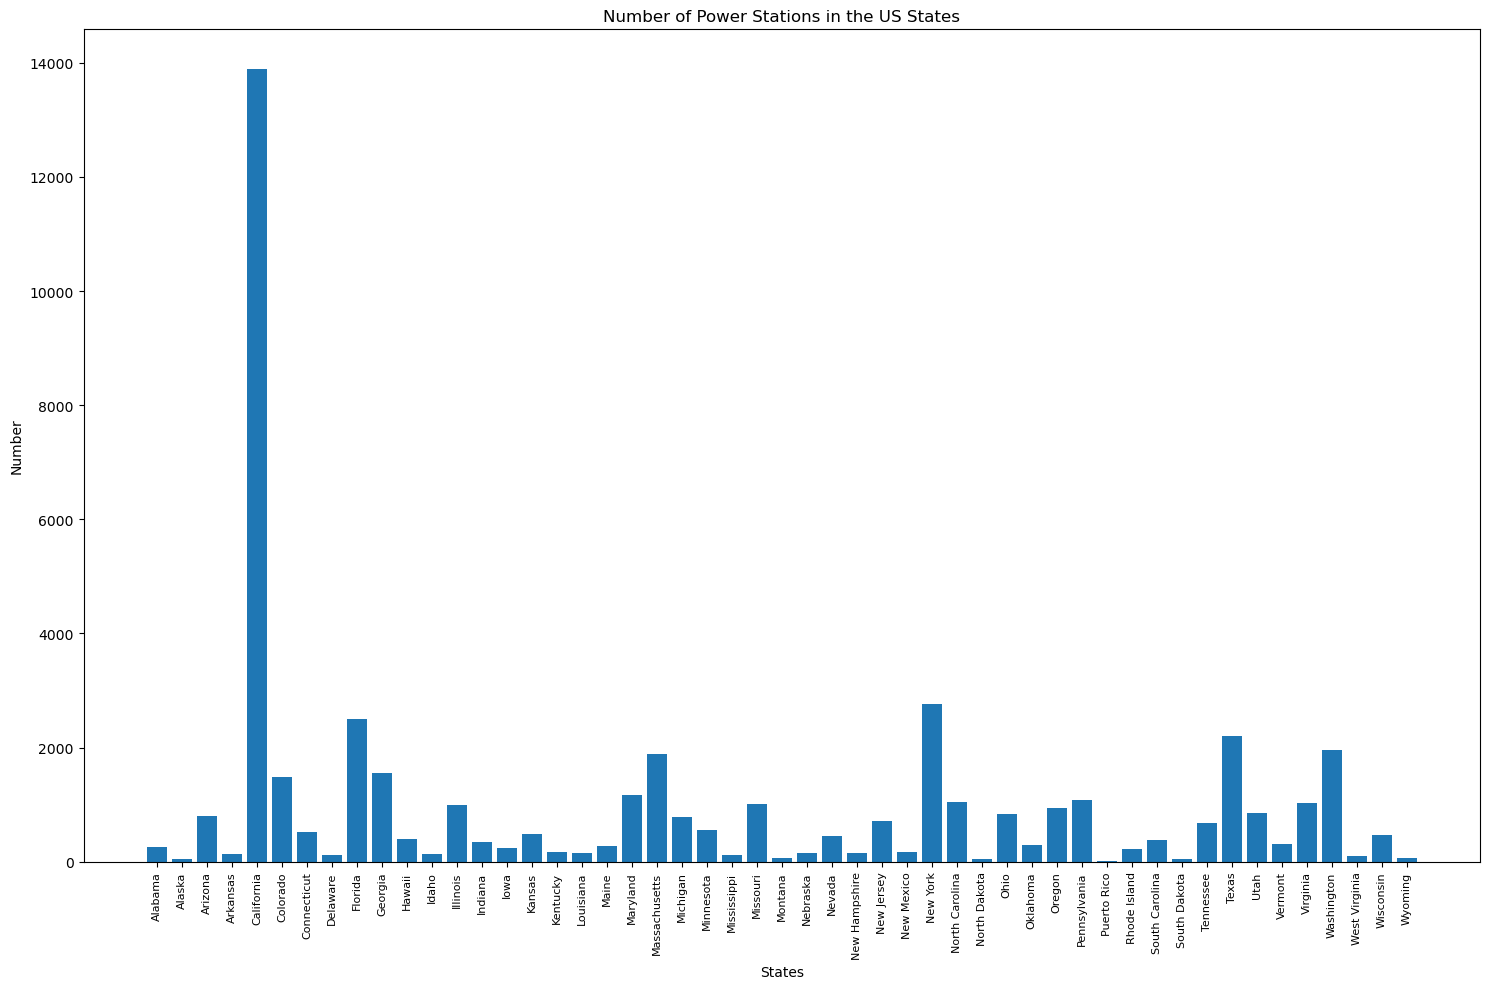

In [ ]:
def insight2():
    import pandas as pd
    import matplotlib.pyplot as plt

    df = pd.read_csv('new_data.csv')

    state_counts = df['State'].value_counts().sort_index()

    plt.figure(figsize=(15, 10))
    plt.bar(state_counts.index, state_counts.values)
    plt.xlabel('States')
    plt.ylabel('Number')
    plt.title('Number of Power Stations in the US States')
    plt.xticks(rotation=90, fontsize=8)
    plt.tight_layout()
    plt.show()

    pass

############ Function Call ############
insight2()

### Insight 2 Explanation



In [ ]:
def insight3():

    tesla_financials = pd.read_csv('Tesla_Financials.csv')
    rivian_financials = pd.read_csv('Rivian_Financials.csv')

    print("Tesla Financials:")
    for index, row in tesla_financials.iterrows():
        print(f"Year: {row['Year']}, Net Income: {row['Net income (mil. USD)']} million USD")

    print('\n')
    print("Rivian Financials:")
    for index, row in rivian_financials.iterrows():
        print(f"Year: {row['Year']}, Net Income: {row['Net income (mil. USD)']} million USD")
    pass


############ Function Call ############
insight3()

Tesla Financials:
Year: 2005, Net Income: −12 million USD
Year: 2006, Net Income: −30 million USD
Year: 2007, Net Income: −78 million USD
Year: 2008, Net Income: −83 million USD
Year: 2009, Net Income: −56 million USD
Year: 2010, Net Income: −154 million USD
Year: 2011, Net Income: −254 million USD
Year: 2012, Net Income: −396 million USD
Year: 2013, Net Income: −74 million USD
Year: 2014, Net Income: −294 million USD
Year: 2015, Net Income: −889 million USD
Year: 2016, Net Income: −675 million USD
Year: 2017, Net Income: −1,962 million USD
Year: 2018, Net Income: −976 million USD
Year: 2019, Net Income: −862 million USD
Year: 2020, Net Income: 721 million USD
Year: 2021, Net Income: 5,519 million USD
Year: 2022, Net Income: 12,556 million USD


Rivian Financials:
Year: 2020, Net Income: −1,018 million USD
Year: 2021, Net Income: −4,688 million USD
Year: 2022, Net Income: −6,752 million USD


### Insight 3 Explanation

Insert explanation here

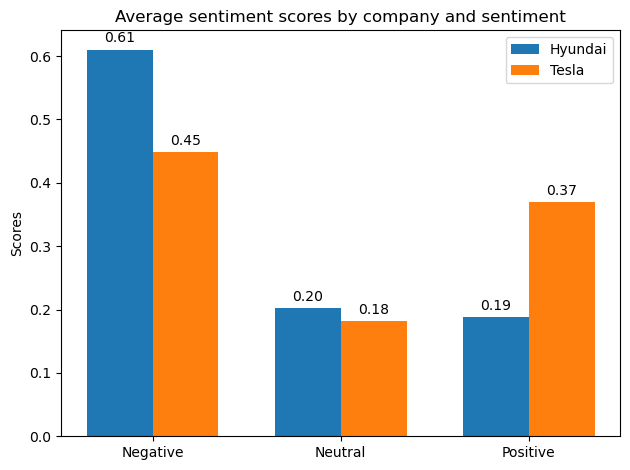

In [ ]:
def insight4():
    import matplotlib.pyplot as plt
    import pandas as pd

    hyundai_sentiment_data = pd.read_csv('hyundai_sentiment_data.csv')
    tesla_sentiment_data = pd.read_csv('tesla_sentiment_data.csv')

    hyundai_avg_sentiment = hyundai_sentiment_data.mean()
    tesla_avg_sentiment = tesla_sentiment_data.mean()

    labels = ['Negative', 'Neutral', 'Positive']
    hyundai_means = hyundai_avg_sentiment.values
    tesla_means = tesla_avg_sentiment.values

    x = list(range(len(labels)))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar([i - width/2 for i in x], hyundai_means, width, label='Hyundai')
    rects2 = ax.bar([i + width/2 for i in x], tesla_means, width, label='Tesla')
    ax.set_ylabel('Scores')
    ax.set_title('Average sentiment scores by company and sentiment')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Function to attach a text label above each bar, displaying its height.
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

    pass


############ Function Call ############
insight4()

### Insight 4 Explanation

Insert explanation here

/var/folders/h2/kz5rv5jj3k7f069vh4d71zwm0000gn/T/ipykernel_41614/4225516684.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerstation_data_clean['Year'] = powerstation_data_clean['Open Date'].dt.year


Number of Power Stations Opened in 5-Year Intervals:
Year
1995       38
2000       38
2005       54
2010     4760
2015    14495
2020    26406
Name: count, dtype: int64


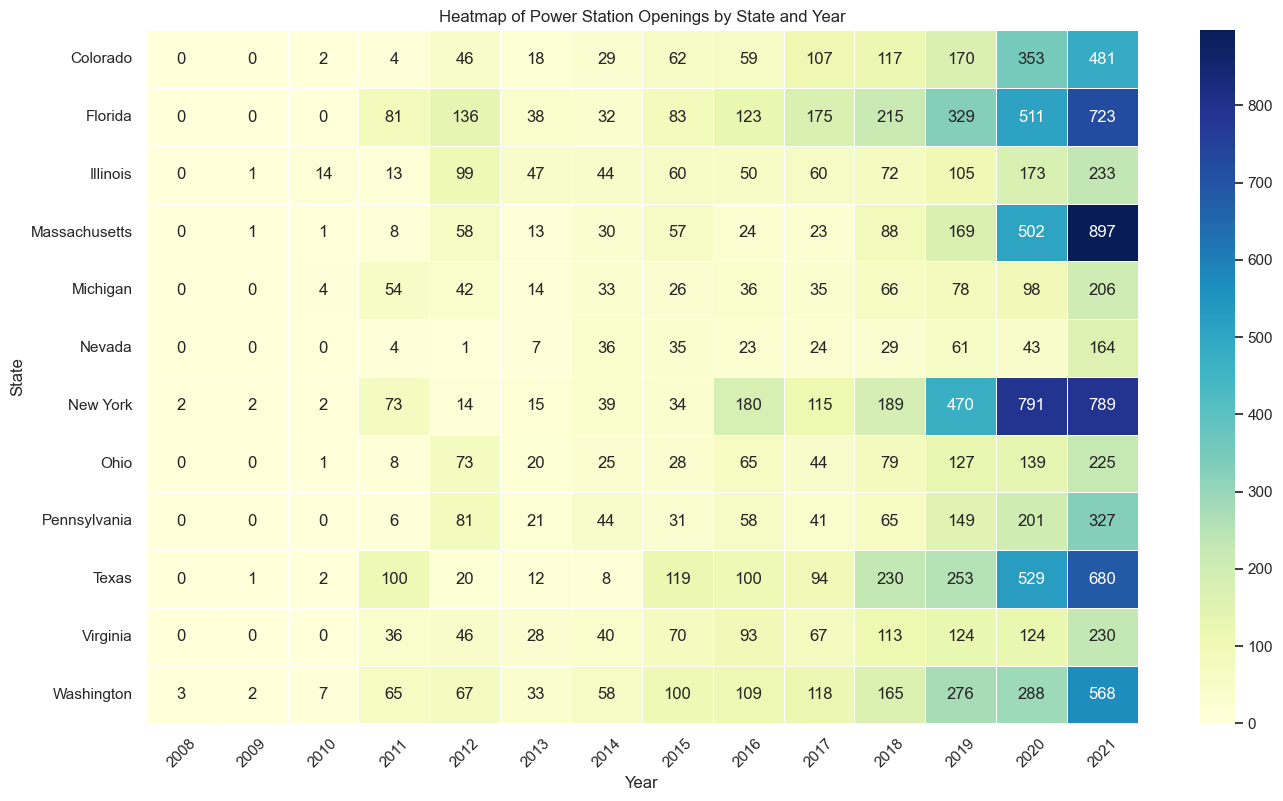

In [ ]:
def insight5():
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Load the CSV file
    file_path = 'powerstation_data.csv'
    powerstation_data = pd.read_csv(file_path)

    # Convert 'Open Date' to datetime format and extract year
    powerstation_data['Open Date'] = pd.to_datetime(powerstation_data['Open Date'], errors='coerce')
    powerstation_data_clean = powerstation_data.dropna(subset=['Open Date'])
    powerstation_data_clean['Year'] = powerstation_data_clean['Open Date'].dt.year

    # Count the number of power stations opened in 5-year intervals
    interval_count = powerstation_data_clean['Year'].apply(lambda x: 5 * (x // 5)).value_counts().sort_index()

    # Printing the count of power stations opened in 5-year intervals
    print("Number of Power Stations Opened in 5-Year Intervals:")
    print(interval_count)

    # selected states from each US region
    selected_states = ['New York', 'Massachusetts', 'Pennsylvania', 'Ohio', 'Illinois', 'Michigan',
                       'Texas', 'Florida', 'Virginia', 'Nevada', 'Washington', 'Colorado']

    #Filter the data to include only the selected states
    filtered_data = powerstation_data_clean[powerstation_data_clean['State'].isin(selected_states)]
    pivot_table = filtered_data.pivot_table(index='State', columns='Year', aggfunc='size', fill_value=0)
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 9))
    sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=True, fmt='d')

    plt.title('Heatmap of Power Station Openings by State and Year')
    plt.xlabel('Year')
    plt.ylabel('State')

    # Rotate x-axis labs for readability
    plt.xticks(rotation=45)

    plt.show()
    pass

############ Function Call ############
insight5()

### Insight 5 Explanation

Insert explanation here

## Data Visualizations

/var/folders/h2/kz5rv5jj3k7f069vh4d71zwm0000gn/T/ipykernel_41614/3442449805.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_data.csv')


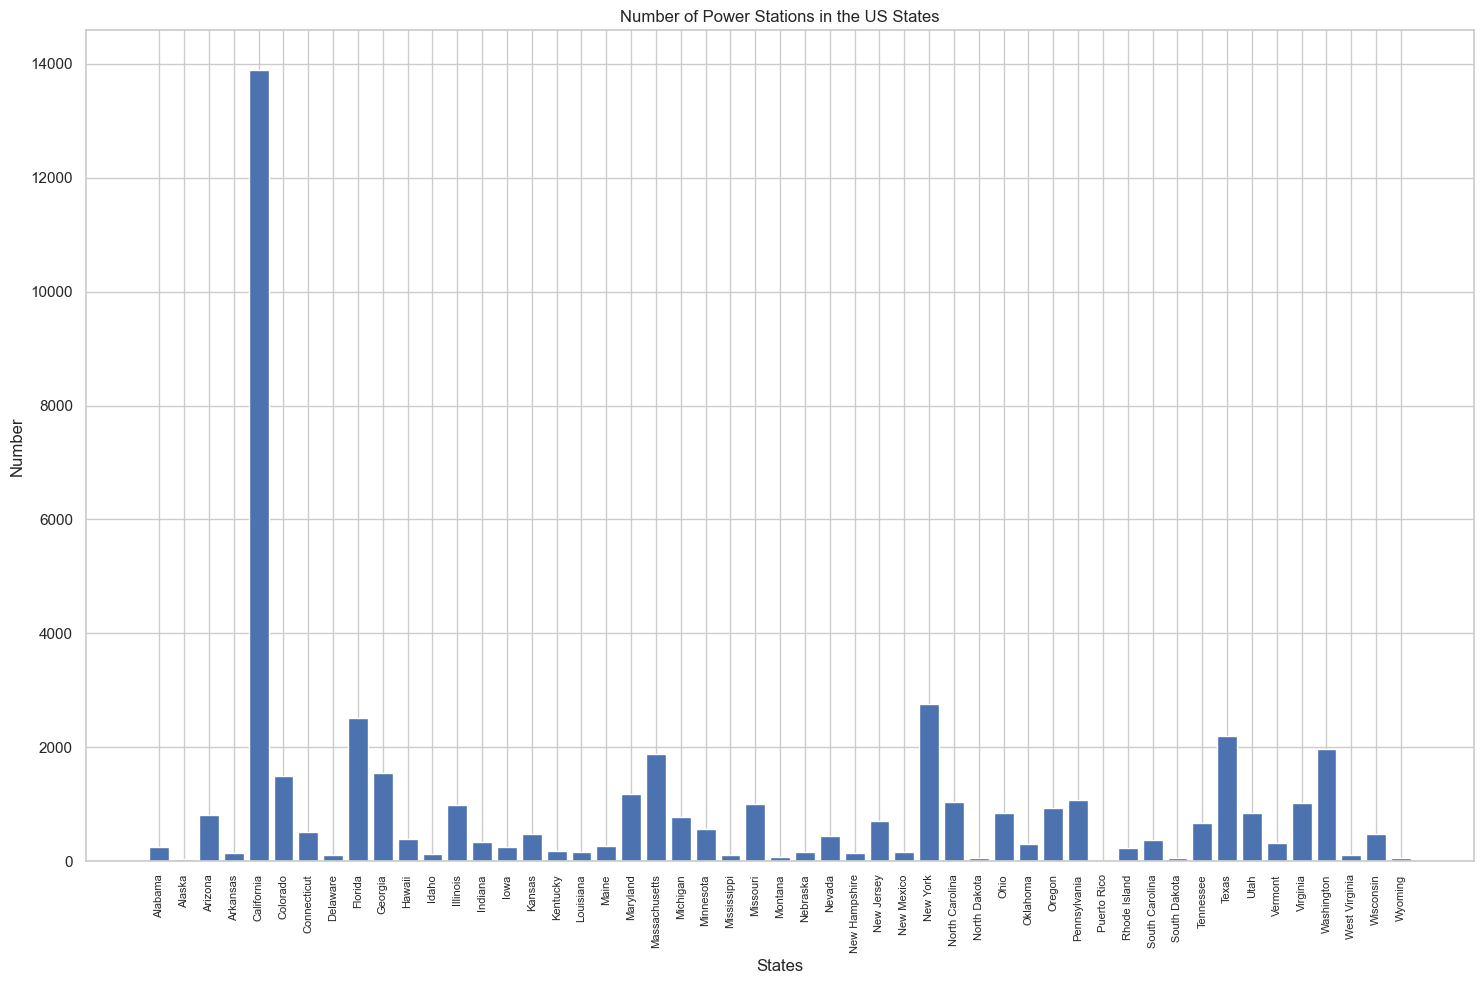

In [ ]:
def visual1():
    import pandas as pd
    import matplotlib.pyplot as plt

    df = pd.read_csv('new_data.csv')

    state_counts = df['State'].value_counts().sort_index()

    plt.figure(figsize=(15, 10))
    plt.bar(state_counts.index, state_counts.values)
    plt.xlabel('States')
    plt.ylabel('Number')
    plt.title('Number of Power Stations in the US States')
    plt.xticks(rotation=90, fontsize=8)
    plt.tight_layout()
    plt.show()

    pass


############ Function Call ############
visual1()

### Visualization 1 Explanation

Insert explanation here

/var/folders/h2/kz5rv5jj3k7f069vh4d71zwm0000gn/T/ipykernel_98309/2720126420.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerstation_data_clean['Year'] = powerstation_data_clean['Open Date'].dt.year


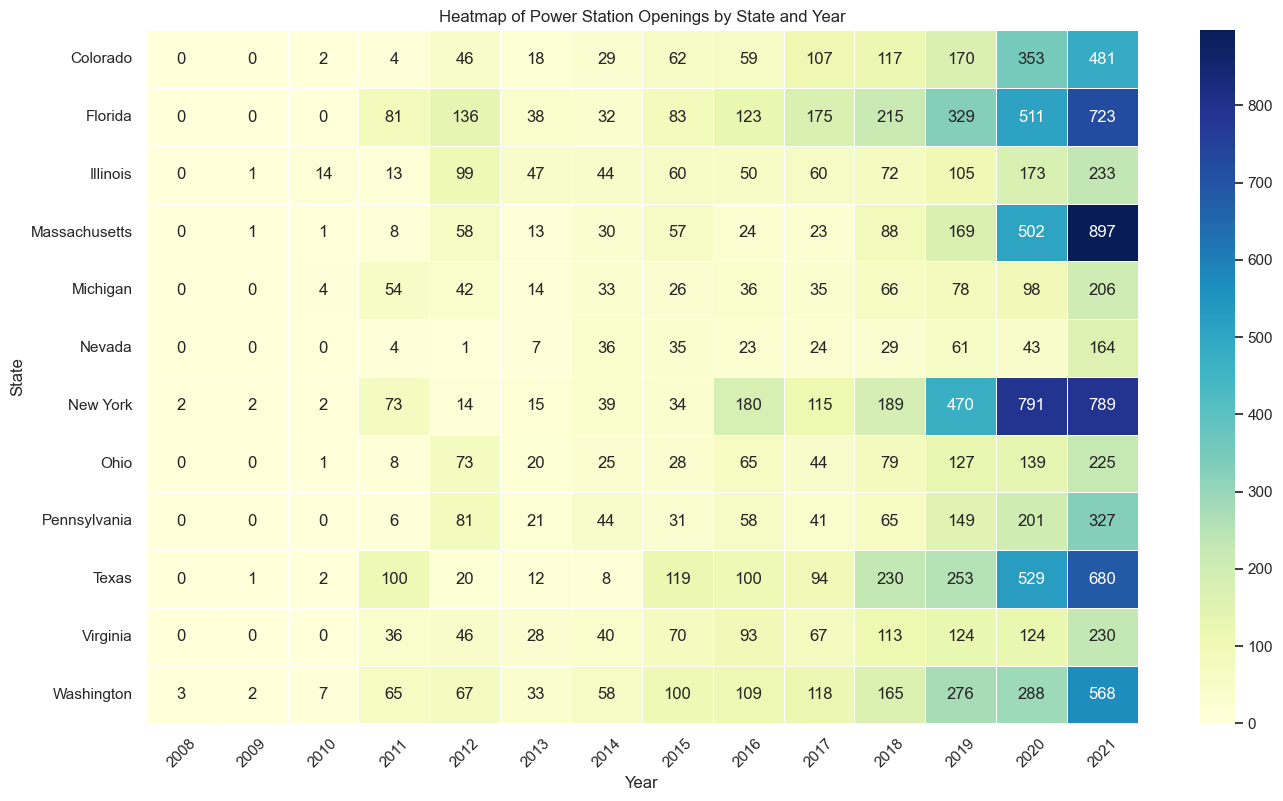

In [ ]:
def visual2():
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Load the CSV file
    file_path = 'powerstation_data.csv'
    powerstation_data = pd.read_csv(file_path)

    # Convert 'Open Date' to datetime format and extract year
    powerstation_data['Open Date'] = pd.to_datetime(powerstation_data['Open Date'], errors='coerce')
    powerstation_data_clean = powerstation_data.dropna(subset=['Open Date'])
    powerstation_data_clean['Year'] = powerstation_data_clean['Open Date'].dt.year

    # selected states from each US region
    selected_states = ['New York', 'Massachusetts', 'Pennsylvania', 'Ohio', 'Illinois', 'Michigan',
                       'Texas', 'Florida', 'Virginia', 'Nevada', 'Washington', 'Colorado']

    #Filter the data to include only the selected states
    filtered_data = powerstation_data_clean[powerstation_data_clean['State'].isin(selected_states)]
    pivot_table = filtered_data.pivot_table(index='State', columns='Year', aggfunc='size', fill_value=0)
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 9))
    sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=True, fmt='d')

    plt.title('Heatmap of Power Station Openings by State and Year')
    plt.xlabel('Year')
    plt.ylabel('State')

    # Rotate x-axis labs for readability
    plt.xticks(rotation=45)

    plt.show()


    pass


############ Function Call ############
visual2()

### Visualization 2 Explanation

Insert explanation here

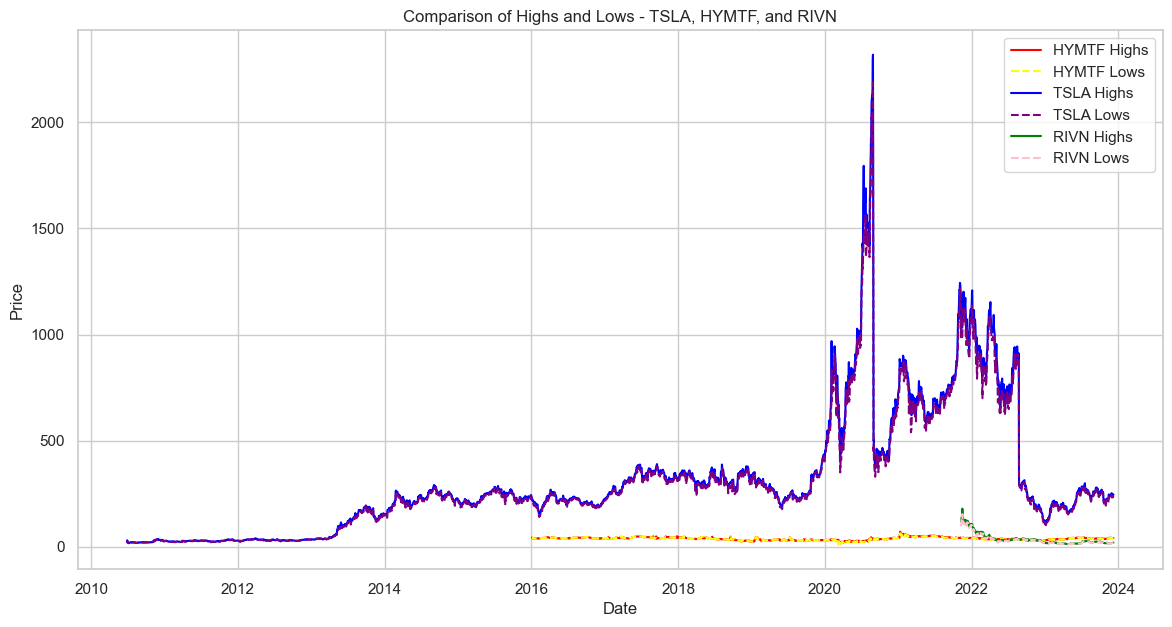

In [ ]:
def visual3():
    import pandas as pd
    import matplotlib.pyplot as plt

    hyundai_path = 'HYMTF_data.csv'
    tesla_path = 'TSLA_data.csv'
    rivian_path = 'RIVN_data.csv'

    hyundai_data = pd.read_csv(hyundai_path)
    tesla_data = pd.read_csv(tesla_path)
    rivian_data = pd.read_csv(rivian_path)

    #  dates and high/low prices
    hyundai_highs = hyundai_data['2. high']
    hyundai_lows = hyundai_data['3. low']
    tesla_highs = tesla_data['2. high']
    tesla_lows = tesla_data['3. low']
    rivian_highs = rivian_data['2. high']
    rivian_lows = rivian_data['3. low']

    dates_hyundai = pd.to_datetime(hyundai_data['date'])
    dates_tesla = pd.to_datetime(tesla_data['date'])
    dates_rivian = pd.to_datetime(rivian_data['date'])

    # Plotting
    plt.figure(figsize=(14, 7))

    plt.plot(dates_hyundai, hyundai_highs, label='HYMTF Highs', color='red', linestyle='-')
    plt.plot(dates_hyundai, hyundai_lows, label='HYMTF Lows', color='yellow', linestyle='--')

    plt.plot(dates_tesla, tesla_highs, label='TSLA Highs', color='blue', linestyle='-')
    plt.plot(dates_tesla, tesla_lows, label='TSLA Lows', color='purple', linestyle='--')

    plt.plot(dates_rivian, rivian_highs, label='RIVN Highs', color='green', linestyle='-')
    plt.plot(dates_rivian, rivian_lows, label='RIVN Lows', color='pink', linestyle='--')

    plt.title('Comparison of Highs and Lows - TSLA, HYMTF, and RIVN')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    pass



############ Function Call ############
visual3()

### Visualization 3 Explanation

Insert explanation here

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:

*   https://www.alphavantage.co/documentation/
*   https://github.com/mehranshakarami/AI_Spectrum/tree/main/2022/Sentiment_Analysis
*   https://matplotlib.org/stable/plot_types/index.html
*   https://doc.qt.io/qtforpython-6/tutorials/index.html


# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
